# **Values of $f_{R0}$ that break the neural networks performance:**
## Classification task: Hu-Sawicki f(R) MG vs ΛCDM at the CMB angular power spectra level

In [1]:
#Import packages
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt

In [2]:
#Read the data
def read_component_data(file_path, start_line):
    f_R0, Corr_pred, Wrong_pred = [], [], []
    with open(file_path, 'r') as file:
        lines = file.readlines()
        for line in lines[start_line:]:
            #Stop reading if there's a new header
            if line.startswith("#"):
                break
            #Split the data and convert to floats
            data = line.strip().split(',')
            if len(data) == 3:
                f_R0.append(float(data[0]))
                Corr_pred.append(float(data[1]))
                Wrong_pred.append(float(data[2]))
    return np.array(f_R0), np.array(Corr_pred), np.array(Wrong_pred)

file_path = './F_R0_size.txt'

#Read data for each component
f_R0, Corr_CTT, Wrong_CTT = read_component_data(file_path, 2)  #CEE data starts in line 2
f_R0_CTE, Corr_CTE, Wrong_CTE = read_component_data(file_path, 9)  #CTE data starts in line 9
f_R0_CTT, Corr_CEE, Wrong_CEE = read_component_data(file_path, 16) #CTT data starts in line 16
f_R0_Joint, Corr_Joint, Wrong_Joint = read_component_data(file_path, 23)  # Joint analysis starts in line 23

print("CEE component:", f_R0, Corr_CEE, Wrong_CEE)
print("CTE component:", f_R0, Corr_CTE, Wrong_CTE)
print("CTT component:", f_R0, Corr_CTT, Wrong_CTT)
print("Joint analysis:", f_R0, Corr_Joint, Wrong_Joint)

CEE component: [1.e-04 1.e-05 1.e-06 1.e-07 1.e-08] [0.473 0.48  0.476 0.471 0.47 ] [0.527 0.52  0.524 0.529 0.53 ]
CTE component: [1.e-04 1.e-05 1.e-06 1.e-07 1.e-08] [0.486 0.485 0.483 0.476 0.471] [0.514 0.515 0.516 0.523 0.528]
CTT component: [1.e-04 1.e-05 1.e-06 1.e-07 1.e-08] [0.995 0.95  0.9   0.475 0.47 ] [0.005 0.041 0.096 0.525 0.53 ]
Joint analysis: [1.e-04 1.e-05 1.e-06 1.e-07 1.e-08] [0.952 0.952 0.867 0.47  0.46 ] [0.048 0.048 0.033 0.53  0.54 ]


## $f_{R0}$ size effect on the NN, trained with $C^{EE}_{\ell}$ data

Text(0, 0.5, 'Performance (Trained on $C^{EE}_{\\ell}$)')

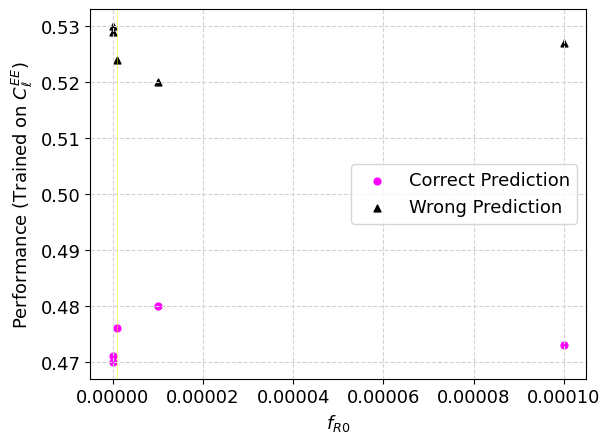

In [3]:
#Plot A_0 values vs NN performance (correct prediction & wrong prediction)
PS = 'EE'
size=24
fsize=13
fR0_fid=1.e-6 #fiducial value
plt.scatter(f_R0, Corr_CEE, s=size, color='magenta', label='Correct Prediction')
plt.scatter(f_R0, Wrong_CEE, s=size, color='black', marker='^', label='Wrong Prediction')
plt.axvspan(fR0_fid-1.e-7, fR0_fid+1.e-7, color='yellow', alpha=0.5, lw=0)
plt.grid(color='lightgray', linestyle='--')
plt.legend(fontsize=fsize)
plt.xlabel('$f_{R0}$', fontsize=fsize)
plt.xticks(fontsize=fsize)
plt.yticks(fontsize=fsize)
plt.ylabel('Performance (Trained on $C^{EE}_{\ell}$)', fontsize=fsize)

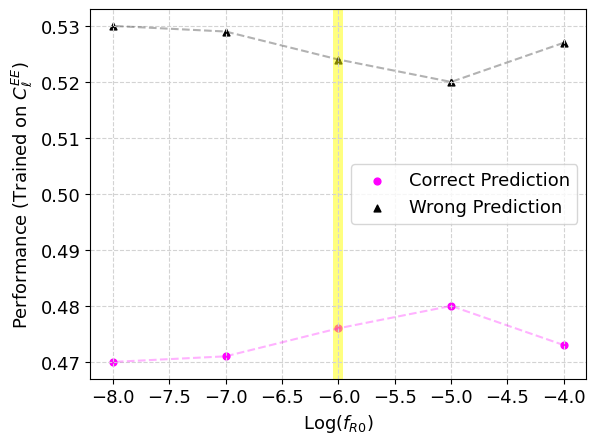

In [4]:
#Logarithmic plot for better visualization
plt.scatter(np.log10(f_R0), Corr_CEE, s=size, color='magenta', label='Correct Prediction')
plt.plot(np.log10(f_R0), Corr_CEE, linestyle='--', color='magenta', alpha=0.3)
plt.scatter(np.log10(f_R0), Wrong_CEE, s=size, color='black', marker='^', label='Wrong Prediction')
plt.plot(np.log10(f_R0), Wrong_CEE, linestyle='--', color='black', alpha=0.3)
plt.legend(fontsize=fsize)
plt.grid(color='lightgray', linestyle='--')
plt.axvspan(np.log10(fR0_fid-1.e-7), np.log10(fR0_fid+1.e-7), color='yellow', alpha=0.5, lw=0)
plt.xlabel('Log($f_{R0}$)', fontsize=fsize)
plt.ylabel('Performance (Trained on $C^{EE}_{\ell}$)', fontsize=fsize)
plt.xticks(fontsize=fsize)
plt.yticks(fontsize=fsize)
plt.savefig('./figures/FR0_values%s.pdf' %PS)

## $f_{R0}$ size effect on the NN, trained with $C^{TE}_{\ell}$ data

Text(0, 0.5, 'Performance (Trained on $C^{TE}_{\\ell}$)')

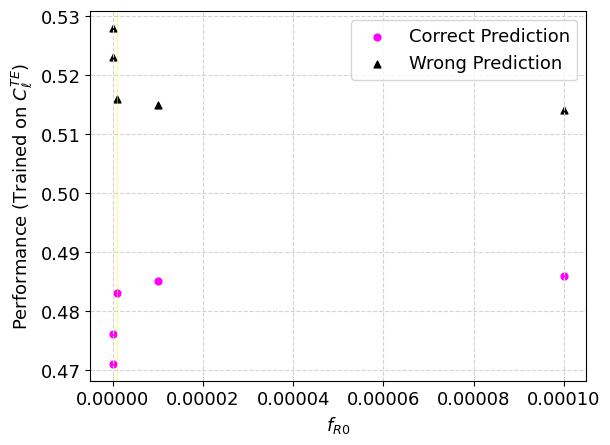

In [5]:
#Plot A_0 values vs NN performance (correct prediction & wrong prediction)
PS = 'TE'
plt.scatter(f_R0, Corr_CTE, s=size, color='magenta', label='Correct Prediction')
plt.scatter(f_R0, Wrong_CTE, s=size, color='black', marker='^', label='Wrong Prediction')
plt.axvspan(fR0_fid-1.e-7, fR0_fid+1.e-7, color='yellow', alpha=0.5, lw=0)
plt.grid(color='lightgray', linestyle='--')
plt.legend(fontsize=fsize)
plt.xlabel('$f_{R0}$', fontsize=fsize)
plt.xticks(fontsize=fsize)
plt.yticks(fontsize=fsize)
plt.ylabel('Performance (Trained on $C^{TE}_{\ell}$)', fontsize=fsize)

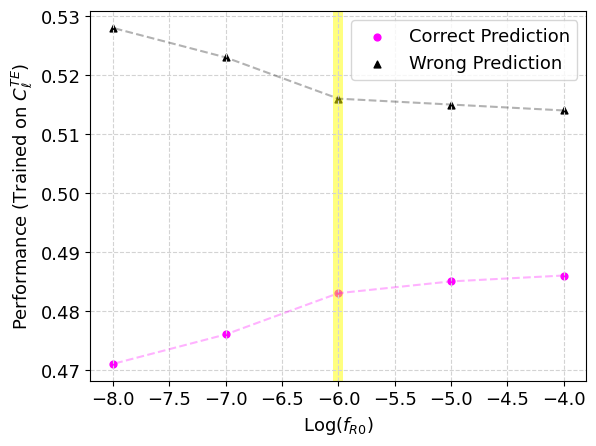

In [6]:
#Logarithmic plot for better visualization
plt.scatter(np.log10(f_R0), Corr_CTE, s=size, color='magenta', label='Correct Prediction')
plt.plot(np.log10(f_R0), Corr_CTE, linestyle='--', color='magenta', alpha=0.3)
plt.scatter(np.log10(f_R0), Wrong_CTE, s=size, color='black', marker='^', label='Wrong Prediction')
plt.plot(np.log10(f_R0), Wrong_CTE, linestyle='--', color='black', alpha=0.3)
plt.legend(fontsize=fsize)
plt.grid(color='lightgray', linestyle='--')
plt.axvspan(np.log10(fR0_fid-1.e-7), np.log10(fR0_fid+1.e-7), color='yellow', alpha=0.5, lw=0)
plt.xlabel('Log($f_{R0}$)', fontsize=fsize)
plt.ylabel('Performance (Trained on $C^{TE}_{\ell}$)', fontsize=fsize)
plt.xticks(fontsize=fsize)
plt.yticks(fontsize=fsize)
plt.savefig('./figures/FR0_values%s.pdf' %PS)

## $f_{R0}$ size effect on the NN, trained with $C^{TT}_{\ell}$ data

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 [Text(0, -0.2, '−0.2'),
  Text(0, 0.0, '0.0'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.4000000000000001, '0.4'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.8, '0.8'),
  Text(0, 1.0000000000000002, '1.0'),
  Text(0, 1.2000000000000002, '1.2')])

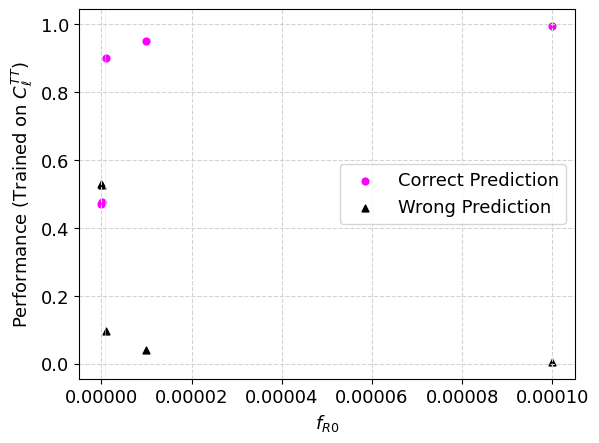

In [7]:
#Plot A_0 values vs NN performance (correct prediction & wrong prediction)
PS = 'TT'
plt.scatter(f_R0, Corr_CTT, s=size, color='magenta', label='Correct Prediction')
plt.scatter(f_R0, Wrong_CTT, s=size, color='black', marker='^', label='Wrong Prediction')
plt.axvspan(fR0_fid-1.e-7, fR0_fid+1.e-7, color='yellow', alpha=0.5, lw=0)
plt.grid(color='lightgray', linestyle='--')
plt.legend(fontsize=fsize)
plt.xlabel('$f_{R0}$', fontsize=fsize)
plt.ylabel('Performance (Trained on $C^{TT}_{\ell}$)', fontsize=fsize)
plt.xticks(fontsize=fsize)
plt.yticks(fontsize=fsize)

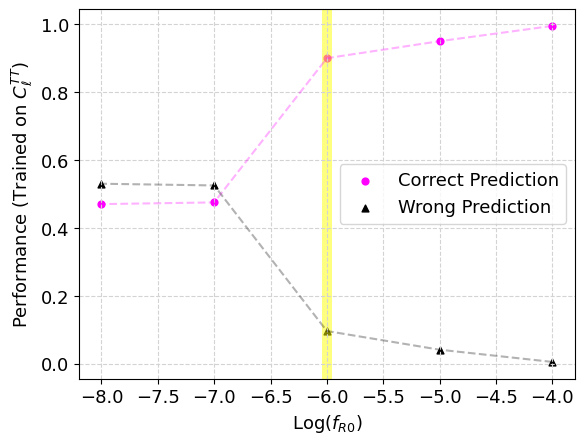

In [8]:
#Logarithmic plot for better visualization
plt.scatter(np.log10(f_R0), Corr_CTT, s=size, color='magenta', label='Correct Prediction')
plt.plot(np.log10(f_R0), Corr_CTT, linestyle='--', color='magenta', alpha=0.3)
plt.scatter(np.log10(f_R0), Wrong_CTT, s=size, color='black', marker='^', label='Wrong Prediction')
plt.plot(np.log10(f_R0), Wrong_CTT, linestyle='--', color='black', alpha=0.3)
plt.legend(fontsize=fsize)
plt.grid(color='lightgray', linestyle='--')
plt.axvspan(np.log10(fR0_fid-1.e-7), np.log10(fR0_fid+1.e-7), color='yellow', alpha=0.5, lw=0)
plt.xlabel('Log($f_{R0}$)', fontsize=fsize)
plt.ylabel('Performance (Trained on $C^{TT}_{\ell}$)', fontsize=fsize)
plt.xticks(fontsize=fsize)
plt.yticks(fontsize=fsize)
plt.savefig('./figures/FR0_values%s.pdf' %PS)

## $f_{R0}$ size effect on the NN, trained with $C^{TT}_{\ell}+C^{TE}_{\ell}+C^{EE}_{\ell}$ data

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 [Text(0, -0.2, '−0.2'),
  Text(0, 0.0, '0.0'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.4000000000000001, '0.4'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.8, '0.8'),
  Text(0, 1.0000000000000002, '1.0')])

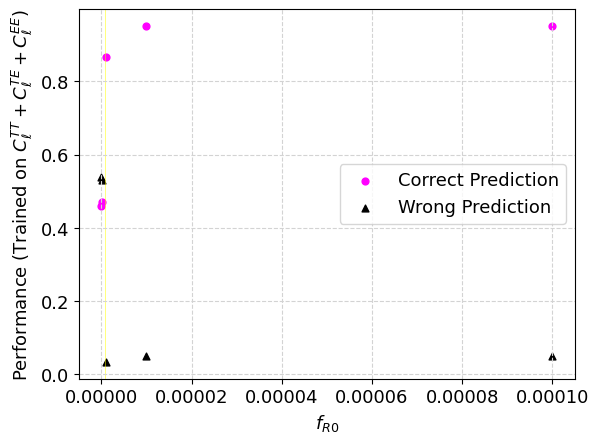

In [9]:
#Plot A_0 values vs NN performance (correct prediction & wrong prediction)
PS = 'Joint'
plt.scatter(f_R0, Corr_Joint, s=size, color='magenta', label='Correct Prediction')
plt.scatter(f_R0, Wrong_Joint, s=size, color='black', marker='^', label='Wrong Prediction')
plt.axvspan(fR0_fid-1.e-7, fR0_fid+1.e-7, color='yellow', alpha=0.5, lw=0)
plt.grid(color='lightgray', linestyle='--')
plt.legend(fontsize=fsize)
plt.xlabel('$f_{R0}$', fontsize=fsize)
plt.ylabel('Performance (Trained on $C^{TT}_{\ell}+C^{TE}_{\ell}+C^{EE}_{\ell}$)', fontsize=fsize)
plt.xticks(fontsize=fsize)
plt.yticks(fontsize=fsize)

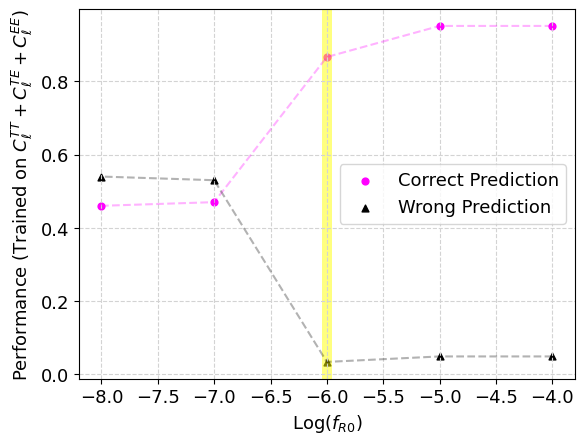

In [10]:
#Logarithmic plot for better visualization
plt.scatter(np.log10(f_R0), Corr_Joint, s=size, color='magenta', label='Correct Prediction')
plt.plot(np.log10(f_R0), Corr_Joint, linestyle='--', color='magenta', alpha=0.3)
plt.scatter(np.log10(f_R0), Wrong_Joint, s=size, color='black', marker='^', label='Wrong Prediction')
plt.plot(np.log10(f_R0), Wrong_Joint, linestyle='--', color='black', alpha=0.3)
plt.legend(fontsize=fsize)
plt.grid(color='lightgray', linestyle='--')
plt.axvspan(np.log10(fR0_fid-1.e-7), np.log10(fR0_fid+1.e-7), color='yellow', alpha=0.5, lw=0)
plt.xlabel('Log($f_{R0}$)', fontsize=fsize)
plt.ylabel('Performance (Trained on $C^{TT}_{\ell}+C^{TE}_{\ell}+C^{EE}_{\ell}$)', fontsize=fsize)
plt.xticks(fontsize=fsize)
plt.yticks(fontsize=fsize)
plt.savefig('./figures/FR0_values%s.pdf' %PS)